In [2]:
from celluloid import Camera
import numpy as np
from matplotlib.collections import LineCollection, PatchCollection
from matplotlib.patches import Polygon

<IPython.core.display.Javascript object>


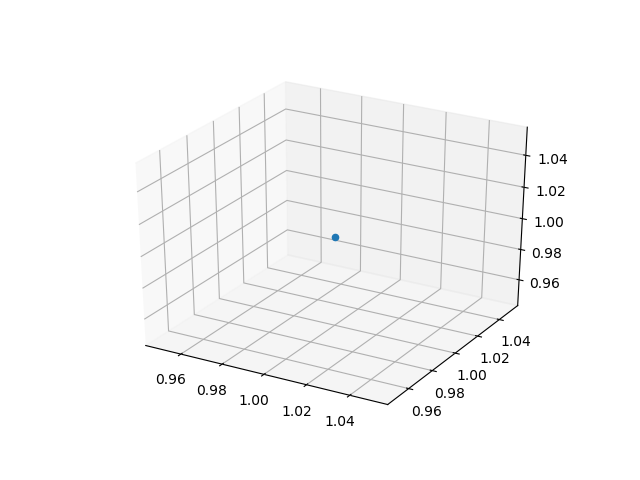

In [4]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(1,1,1)
plt.show()

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.set(xlim=(-0.2,1.2), ylim=(-0.2,1.2))

T = np.random.uniform(0, 1)
theta = np.random.uniform(np.pi / 2, np.pi)
print(T, theta)


threshold = ( ((2**0.5)/2) - (2/3) ) / ((2**0.5)/2)

t = 0
dt = 1 / 900
x = 0.5
y = 0.5
phi = (3 * np.pi / 4) - theta
camera = Camera(fig)
X = []
Y = []

x_teacher, y_teacher = 0, 1
teachX, teachY = [], []
while (x < 1) and (y > 0):
    # pool
    vertices = np.array([
                        [0, 1],
                        [1, 1],
                        [1, 0],
                        [0, 0]
                       ])
    polygon = Polygon(vertices, True, fill="None")
    p = PatchCollection([polygon], edgecolors="#626F80", facecolors="#78B5FF", linewidth=3)
    ax.add_collection(p)
    
    # student
    if x >= (1 + T)/2:
        x += dt * np.cos(phi)
        y += dt * np.sin(phi)
    else:
        x += dt / np.sqrt(2)
        y -= dt / np.sqrt(2)
        
    ax.plot(x, y, "ro")
    ax.plot(X, Y, "r")
    X.append(x)
    Y.append(y)
    
    # teacher
    if (x >= (1 + threshold)/2) or (x >= (1 + T)/2):

        turn_around = 1 + 0.5 + (T / 2) - ((1-T)/2) * np.tan(phi)
        if T > threshold:
            turn_around += (6 * (T - threshold))
    
        long_way    = 2 + ((1 - T)/2) + ( ((1-T)*0.5) * np.tan(phi) )
        
        if long_way < turn_around:
            # long path
            if (x_teacher <= 0) and (y_teacher > 0):
                y_teacher -= 3 * dt
            elif (x_teacher<1) and (y_teacher <= 0):
                x_teacher += 3 * dt
            elif (x_teacher >= 1):
                y_teacher += 3 * dt
            else:
                raise Exception("You missed something")
        else:
            # teacher does turn around
            if x < (1 + T)/2:
                y_teacher -= 3 * dt
            elif (y_teacher < 1) and (x_teacher==0):
                y_teacher += 3 * dt
            elif (y_teacher >= 1) and (x_teacher <= 1):
                x_teacher += 3 * dt
            elif (x_teacher > 1):
                y_teacher -= 3 * dt
            else:
                raise Exception("Fix ya code")
    else:
        print("WAITING")
        
    t += dt 
    ax.plot(x_teacher, y_teacher, "bo")
    ax.text(0.5, 1.02, f"Time: {t:.2f}", ha="center")
    ax.axis("off")
    ax.set_aspect('equal')
    camera.snap()
    
animation = camera.animate(interval=20, repeat=False) 

<IPython.core.display.Javascript object>


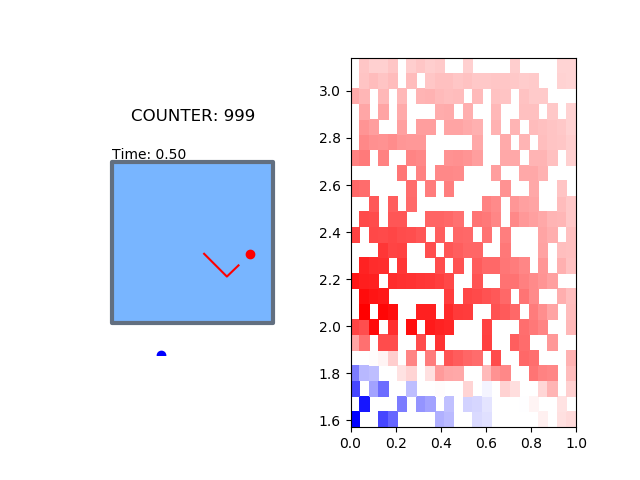

0 0.5532860028651101 2.829500056953308
1 0.8950572946499677 1.6429474561722588
2 0.5219392460308842 2.65711933657992
3 0.37176484019618405 1.8461458431066458
4 0.71013109294802 2.3491963216885363
5 0.38563671850803205 2.02963825877544
6 0.16255590995683145 2.2956259959494463
7 0.392586392094715 2.2251335110031443
8 0.4747088666796775 3.001595289567507
9 0.6876259438470776 1.6208937493071973
10 0.8840272577780511 2.885039739084779
11 0.878845042368683 2.177349599678269
12 0.9993126259304952 2.300524699132738
13 0.16230946202273466 1.7225655070273418
14 0.529768253498316 2.166310610311742
15 0.32135533471581 3.107640293853559
16 0.6219430265140576 2.2550462238095177
17 0.5352940621995421 3.0743968626262683
18 0.4226424048811175 1.8768726523339054
19 0.5201688283452625 2.9478184688947056
20 0.8274377990878383 2.16451003394321
21 0.30402269671726356 2.0418767854441597
22 0.9750692370262554 2.9940801386421176
23 0.06621702368367466 1.7633433026751912
24 0.4182846832139365 3.0031293635151117

202 0.886836905511314 2.7914002318719784
203 0.12166011529285148 1.6628490137489713
204 0.6541338187354788 2.8745863672991874
205 0.8154438113458697 1.770676968975594
206 0.45922243243470684 2.0936798115933177
207 0.3065000984652595 2.2883464984504545
208 0.04568772880974192 2.3663137865557573
209 0.9079813352267725 1.7332424674799012
210 0.8290242517404343 3.077926757906967
211 0.7009993468347647 2.8129988414292404
212 0.40948293082581866 2.175220668004238
213 0.5221956909989576 2.416050041405841
214 0.20312357087404886 2.778904916893688
215 0.6414063004357682 1.5984199437816329
216 0.4564217189247022 3.038129634673563
217 0.5093684669773434 2.883560108784238
218 0.448999347809123 2.61829892816723
219 0.4274606183139924 2.181197365053545
220 0.28771466720956107 2.839660153603078
221 0.04516254183817503 1.6125974004317465
222 0.33039402732144507 2.2520257671830723
223 0.5128232433418619 1.8396741319068035
224 0.3692418068871369 2.940262614812278
225 0.32259900251006346 2.42071547975055

399 0.26164275649260793 2.7417203009951323
400 0.6031386408436661 2.800317746255754
401 0.7684395200472693 2.9852173331290324
402 0.8551469364943901 2.070358907023112
403 0.019311413821930468 2.876712687833514
404 0.30296392136244676 2.520233730721062
405 0.08169150429446581 1.9749057593110861
406 0.903042311885477 1.8317779624892658
407 0.8634118882383511 2.427728893669143
408 0.3083959314335687 2.0733342899485843
409 0.9403109703243582 1.862328001523993
410 0.13185924352241996 3.129834207971572
411 0.856039320080554 1.5873348493840869
412 0.004343113228728379 1.755964243411935
413 0.7759419678767216 2.0808655752077168
414 0.5415142138130348 2.8964509112286
415 0.7476105323390928 2.599672852167762
416 0.6747485479483155 2.0218263364246183
417 0.7759241968120623 1.6622204096522255
418 0.9748748070751662 1.9333072085181229
419 0.42265439579163966 3.0702115966080448
420 0.8016804698859699 2.059026766354747
421 0.8245130471103232 1.7784736851506233
422 0.7494939672025527 3.075088977760048

598 0.41682305916489915 2.698118008248139
599 0.315630210598814 1.892948279004426
600 0.4772390833160689 3.0020021919449063
601 0.28955685212364235 3.062629012583584
602 0.2132475696242685 3.0989828057509943
603 0.5571067584405774 2.231737313119687
604 0.17495037677074798 3.02664490101054
605 0.9211277162050808 2.1914804813424804
606 0.5722841269540607 2.888114745360684
607 0.21830744582823014 1.6446241161934763
608 0.07878695908218536 3.035161815988011
609 0.5332007675288001 3.096213109866273
610 0.9084180694224342 2.7031019056384853
611 0.324212066881879 1.738512790408052
612 0.7311469173339928 2.4836197400515845
613 0.09954537051183576 2.1073548255780032
614 0.5450109869707419 2.05172339473357
615 0.5648928941519987 1.7179974319129019
616 0.2626017154945245 2.8393828074729788
617 0.20587311902396066 2.8008256149823185
618 0.7279185943579608 3.121952903385889
619 0.5456890328684428 2.162858226272767
620 0.7169415523567155 2.318602112721413
621 0.6802188410929689 1.6095944810132576
62

796 0.3773191184761785 2.5956243776927774
797 0.5095019892706458 2.3166455026986412
798 0.5653759249585938 2.785623414186455
799 0.39308530725408186 2.628888719822304
800 0.9882771087671081 2.7887569173930524
801 0.983851391459667 2.5174613883650814
802 0.8106118430382496 2.054245439041276
803 0.883772309630512 2.8886871267537897
804 0.06578907873136552 2.911585622922245
805 0.3999027486809875 1.605974458129882
806 0.058220822106667125 2.4265058299559286
807 0.2532241948091061 1.754851029795243
808 0.957548681031408 2.8065250076613637
809 0.094255388790638 1.8261369348343428
810 0.5396495019413049 2.4034765326949716
811 0.8202541556292459 2.3403706238323876
812 0.03753244824282509 1.7409816573433385
813 0.9429075539402125 2.9860387761112195
814 0.6558547984200356 2.794573677070686
815 0.9761229502929137 2.7160508018999603
816 0.0415157956142338 2.69514357702875
817 0.9028754440467301 2.975452448976653
818 0.866085645560298 2.4740203917168415
819 0.08187617035068417 2.734398209271393
82

992 0.9309814204700236 2.2120332736525348
993 0.9856890419589055 1.7578827152638627
994 0.17364261921597968 2.115020126858635
995 0.35413509064749993 2.8259513158919702
996 0.3689969319607137 2.5014332454528825
997 0.22695376086545382 2.4173703236739206
998 0.06972931694383255 2.9040592722524603
999 0.26887931768023754 2.7559615586785036


In [13]:
# trying to loop it all
%matplotlib notebook
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2,)
ax.set(xlim=(-0.2,1.2), ylim=(-0.2,1.2))

threshold = ( ((2**0.5)/2) - (2/3) ) / ((2**0.5)/2)

# for the winners board
T_range = np.linspace(0, 1, num = 25)
theta_range = np.linspace(np.pi / 2, np.pi, num=25)
winners_board = np.zeros((len(T_range), len(theta_range))) * np.nan
camera = Camera(fig)
count = 0
while count < 1000:
    T = np.random.uniform(0, 1)
    theta = np.random.uniform(np.pi / 2, np.pi)
    phi = (3 * np.pi / 4) - theta
    print(count, T, theta)
    t = 0
    dt = 1 / 10
    x = 0.5
    y = 0.5
    
    
    X = []
    Y = []

    x_teacher, y_teacher = 0, 1
    teachX, teachY = [], []
    while (x < 1) and (y > 0):
        # pool
        vertices = np.array([
                            [0, 1],
                            [1, 1],
                            [1, 0],
                            [0, 0]
                           ])
        polygon = Polygon(vertices, True, fill="None")
        p = PatchCollection([polygon], edgecolors="#626F80", facecolors="#78B5FF", linewidth=3)
        ax.add_collection(p)
    
        # student
        if x >= (1 + T)/2:
            x += dt * np.cos(phi)
            y += dt * np.sin(phi)
        else:
            x += dt / np.sqrt(2)
            y -= dt / np.sqrt(2)

        ax.plot(x, y, "ro")
        ax.plot(X, Y, "r")
        X.append(x)
        Y.append(y)
    
        # teacher
        if (x >= (1 + threshold)/2) or (x >= (1 + T)/2):

            turn_around = 1 + 0.5 + (T / 2) - ((1-T)/2) * np.tan(phi)
            if T > threshold:
                turn_around += (6 * (T - threshold))

            long_way    = 2 + ((1 - T)/2) + ( ((1-T)*0.5) * np.tan(phi) )

            if long_way < turn_around:
                # long path
                if (x_teacher <= 0) and (y_teacher > 0):
                    y_teacher -= 3 * dt
                elif (x_teacher<1) and (y_teacher <= 0):
                    x_teacher += 3 * dt
                elif (x_teacher >= 1):
                    y_teacher += 3 * dt
                else:
                    raise Exception("You missed something")
            else:
                # teacher does turn around
                if x < (1 + T)/2:
                    y_teacher -= 3 * dt
                elif (y_teacher < 1) and (x_teacher==0):
                    y_teacher += 3 * dt
                elif (y_teacher >= 1) and (x_teacher <= 1):
                    x_teacher += 3 * dt
                elif (x_teacher > 1):
                    y_teacher -= 3 * dt
                else:
                    raise Exception("Fix ya code")

        t += dt 
        ax.plot(x_teacher, y_teacher, "bo")
        ax.text(0, 1.02, f"Time: {t:.2f}", ha="left")
        ax.axis("off")
        ax.set_aspect('equal')
        
        # Plot the winners board
        ix_T = np.argmin(abs(T_range - T))
        ix_theta = np.argmin(abs(theta_range - theta))

        student_length = T * (np.sqrt(2)/2) + (1 - T) / (2 * np.cos(phi))

        turn_around = 1 + 0.5 + (T / 2) - ((1-T)/2) * np.tan(phi)
        if T > threshold:
            turn_around += (6 * (T - threshold))
        long_way    = 2 + ((1 - T)/2) + ( ((1-T)*0.5) * np.tan(phi) )
        teacher_length = min(turn_around, long_way)

        winners_board[ix_T, ix_theta] = teacher_length - student_length
        ax2.pcolormesh(T_range, theta_range, winners_board, cmap=plt.cm.magma)

        camera.snap()
    ax.set(title=f"COUNTER: {count}")
    count += 1
    
animation = camera.animate(interval=5, repeat=False) 

In [ ]:
%matplotlib inline
colors = np.zeros((10,10)) * np.nan
for i in range(10):
    colors[i, i] = i
x = range(10)
y = range(10)
plt.pcolormesh(x, y, colors)
plt.show()

In [ ]:
T_range = np.linspace(0, 1, num = 100)
theta_range = np.linspace(np.pi / 2, np.pi, num=100)
winners_board = np.zeros((len(T_range), len(theta_range))) * np.nan

ix_T = np.argmin(abs(T_range - T))
ix_theta = np.argmin(abs(theta_range - theta))

student_length = T * (np.sqrt(2)/2) + (1 - T) / (2 * np.cos(phi))

turn_around = 1 + 0.5 + (T / 2) - ((1-T)/2) * np.tan(phi)
if T > threshold:
    turn_around += (6 * (T - threshold))
long_way    = 2 + ((1 - T)/2) + ( ((1-T)*0.5) * np.tan(phi) )
teacher_length = min(turn_around, long_way)

winners_board[ix_T, ix_theta] = teacher_lenght - student_length